In [0]:
!pip install scaleogram
import scaleogram as scg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt as pw
import scipy as sp
from google.colab import drive,files
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/

In [0]:
def q_m(q,r):
  return [r[0]*q[0]-r[1]*q[1]-r[2]*q[2]-r[3]*q[3],
          r[0]*q[1]+r[1]*q[0]-r[2]*q[3]+r[3]*q[2],
          r[0]*q[2]+r[1]*q[3]+r[2]*q[0]-r[3]*q[1],
          r[0]*q[3]-r[1]*q[2]+r[2]*q[1]+r[3]*q[0]]
def q_c(q):
  return [q[0],-q[1],-q[2],-q[3]]

In [0]:
u,s,vh = np.linalg.svd(rot)
vh

In [0]:
nm0= 'Football ground/Ball kicks/LOG12-0-ball kicks2-video.CSV'
nm1='Football ground/Running/LOG9-0-running_600ft.CSV'
nm2='Football ground/Dribbling/LOG10-0-dribbling_400ft_1ballkick.CSV'
nm3='Walking DataSet/RAW_1KM/1KM_1391Steps(1).CSV'
nm4='LOG1-0.CSV'
ct = slice(int(50e2),int(70e2))
w=200
l='g'
Oz=[0,0,1]
dat = pd.read_csv(nm3, sep=',', names=['t','ax','ay','az','gx','gy','gz','mx','my','mz'])
d=dat[ct]
mc=d[[l+'x',l+'y',l+'z',]].to_numpy()
#mc=rot
wn=int(mc.shape[0]/w)
rot=np.zeros(mc.shape)
normals=np.zeros([wn,3])
mens=np.zeros([wn,3])
for i in range(0,wn):
  ma=mc[i*w:i*w+w]
  mean=np.mean(ma,axis=0)
  ma-=mean
  u,s,vh = np.linalg.svd(ma)
  n=vh[2,:]
  n/=np.linalg.norm(n)
  normals[i,:]=n
  mens[i,:]=mean
  do=np.cross(Oz,n)
  w0=np.dot(Oz,n)+1
  q=[w0,-do[0],-do[1],-do[2]]
  q/=np.linalg.norm(q)
  for j in range(w):
    r=[0,ma[j,0],ma[j,1],ma[j,2]]
    rot[i*w+j,:]=q_m(q_m(q,r),q_c(q))[1:]   
#print(normals)

d=d.assign(am=(d['ax']**2+d['ay']**2+d['az']**2)**.5)
d=d.assign(gm=(d['gx']**2+d['gy']**2+d['gz']**2)**.5)
d=d.assign(mm=(d['mx']**2+d['my']**2+d['mz']**2)**.5)
d=d.assign(asu=d['ax']+d['ay']+d['az'])
d=d.assign(gsu=d['gx']+d['gy']+d['gz'])
d=d.assign(msu=d['mx']+d['my']+d['mz'])
d=d.assign(a1=d['ax']/d['am'])
d=d.assign(a2=d['ay']/d['am'])
d=d.assign(a3=d['az']/d['am'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


"fig1 = plt.figure(figsize=[15,15])\nax1 = fig1.gca(projection='3d')\nax1.scatter(x,y,z)\n\nfig,ax = plt.subplots(3,1, figsize=[20,8])\nax[0].plot(d[l+'1'],'b')\nax[1].plot(d[l+'2'],'g')\nax[2].plot(d[l+'3'],'m')\n\nfig1 = plt.figure(figsize=[15,15])\nax1 = fig1.gca(projection='3d')\nax1.plot(d[l+'x'],d[l+'y'],d[l+'z'])"

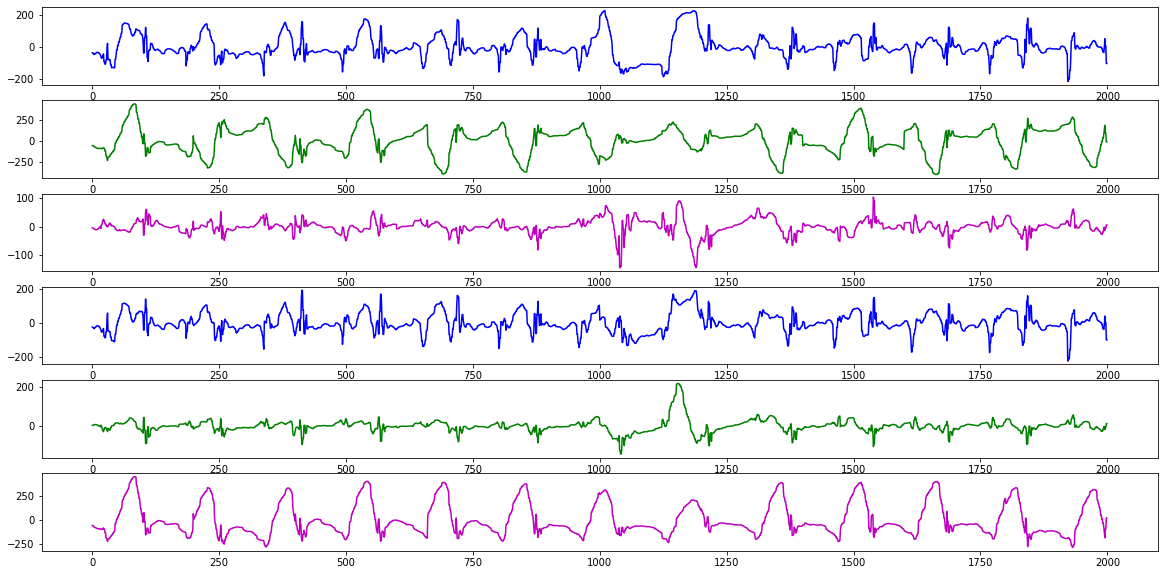

In [0]:
fig,ax = plt.subplots(6,1, figsize=[20,10])
'''ax[0].plot(d[l+'x'],'b')
ax[1].plot(d[l+'y'],'g')
ax[2].plot(d[l+'z'],'m')
ax[3].plot(d[l+'su'],'black')
ax[4].plot(d[l+'m'],'orange')'''
ax[0].plot(rot[:,0],'b')
ax[1].plot(rot[:,1],'g')
ax[2].plot(rot[:,2],'m')
ax[3].plot(mc[:,0],'b')
ax[4].plot(mc[:,1],'g')
ax[5].plot(mc[:,2],'m')

s=w*3
x=rot[s:s+w,0]
y=rot[s:s+w,1]
z=rot[s:s+w,2]

'''fig1 = plt.figure(figsize=[15,15])
ax1 = fig1.gca(projection='3d')
ax1.scatter(x,y,z)

fig,ax = plt.subplots(3,1, figsize=[20,8])
ax[0].plot(d[l+'1'],'b')
ax[1].plot(d[l+'2'],'g')
ax[2].plot(d[l+'3'],'m')

fig1 = plt.figure(figsize=[15,15])
ax1 = fig1.gca(projection='3d')
ax1.plot(d[l+'x'],d[l+'y'],d[l+'z'])'''

In [0]:
aa=np.zeros([100,3])
aa[:,0]=1+np.random.randn(100)*111
aa[:,1]=1+np.random.randn(100)*111
aa[:,2]=1+np.random.randn(100)*0
u,s,vh = np.linalg.svd(rot)
print(s,'\n',vh,np.dot(vh[1,:],vh[2,:]))

[13424.28860213  9871.44055332  4640.07668576] 
 [[-2.09630946e-01  9.77780582e-01 -1.31755834e-16]
 [ 9.77780582e-01  2.09630946e-01 -2.82477486e-17]
 [ 0.00000000e+00  1.34749898e-16  1.00000000e+00]] 0.0


TypeError: ignored

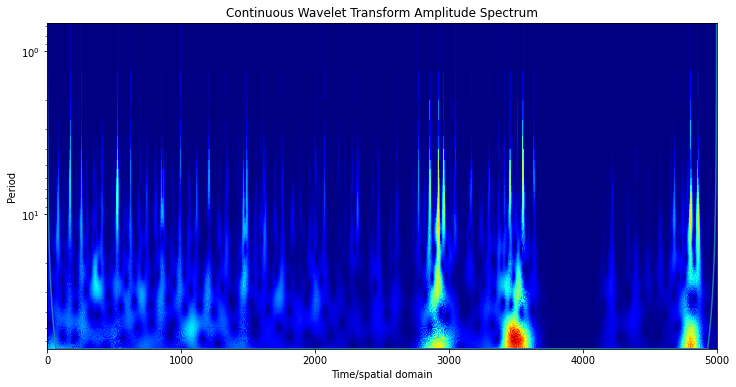

In [0]:
ln=d.shape[0]
ax = scg.cws(rot[:,1], scales=np.arange(1,100),wavelet='cmor0.7-1.5',spectrum='amp', figsize=(12,6), yscale='log')
'''
coef, freqs=pywt.cwt(acc.iloc[:,3], np.arange(1,10),'gaus1')
plt.figure(figsize=[20,5])
plt.matshow(coef, fignum=1, aspect='auto')
'''

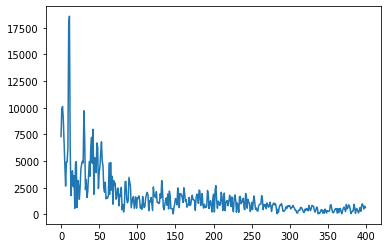

In [0]:
import scipy.signal as sg
aa=np.arange(1,100,.01)
s=np.sin(5*aa)
s2=np.sin(5.2*aa)
_,dc=sg.deconvolve(s,s2)

f=np.fft.fft((d['gx']-np.mean(d['gx']))*np.hamming(d.shape[0]))
plt.plot(np.abs(f[:400]))
#plt.plot(np.real(f[:250]))

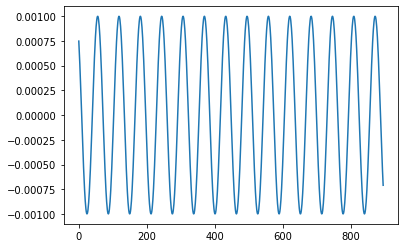

In [0]:
aa=np.arange(1,10,1e-2)
b=np.sin(10*aa)
c=np.diff(b,3)
plt.plot(c)